## import pandas, numpy and matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data into Pandas

In [2]:
colombia = pd.read_csv("data/colombia_edit.csv")

In [3]:
colombia.head()

,iyear,latitude,longitude,attacktype1_txt,gname,nkill
0,1970,5.059097,-75.505960,Hostage Taking (Kidnapping),Unknown,NaN
1,1972,4.594635,-74.093737,Assassination,Unknown,1.0
2,1972,6.267500,-75.568611,Hostage Taking (Kidnapping),National Liberation Army of Colombia (ELN),0.0
3,1973,NaN,NaN,Hostage Taking (Kidnapping),National Liberation Army of Colombia (ELN),0.0
4,1973,8.312931,-75.142561,Hostage Taking (Kidnapping),Popular Liberation Army (EPL),NaN


In [4]:
colombia['nkill'].fillna(0, inplace=True)

In [7]:
colombia.head()

,iyear,latitude,longitude,attacktype1_txt,gname,nkill
0,1970,5.059097,-75.505960,Hostage Taking (Kidnapping),Unknown,0.0
1,1972,4.594635,-74.093737,Assassination,Unknown,1.0
2,1972,6.267500,-75.568611,Hostage Taking (Kidnapping),National Liberation Army of Colombia (ELN),0.0
3,1973,NaN,NaN,Hostage Taking (Kidnapping),National Liberation Army of Colombia (ELN),0.0
4,1973,8.312931,-75.142561,Hostage Taking (Kidnapping),Popular Liberation Army (EPL),0.0


## Number of attacks per year

In [8]:
year_count = colombia.groupby('iyear').count()

In [9]:
year_count.head()

,latitude,longitude,attacktype1_txt,gname,nkill
iyear,,,,,
1970,1,1,1,1,1
1972,2,2,2,2,2
1973,4,4,6,6,6
1975,8,8,10,10,10
1976,21,21,22,22,22


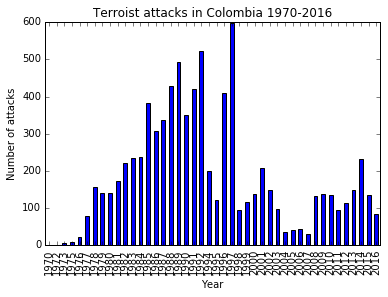

In [10]:
year_count['attacktype1_txt'].plot.bar()
plt.ylabel("Number of attacks")
plt.xlabel("Year")
plt.title("Terroist attacks in Colombia 1970-2016")

## Number of deaths per year

In [15]:
death_count = colombia.filter(['iyear', 'nkill']).groupby('iyear')

In [23]:
death_count_summed = death_count.sum()

In [28]:
death_count_summed

,nkill
iyear,
1970,0.0
1972,1.0
1973,0.0
1975,7.0
1976,10.0
1977,38.0
1978,71.0
1979,156.0
1980,159.0


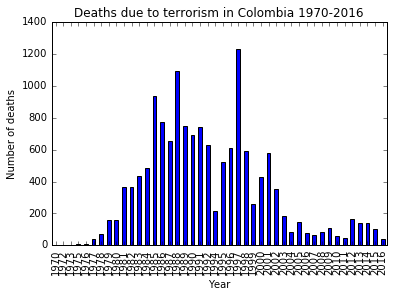

In [29]:
death_count_summed['nkill'].plot.bar()
plt.ylabel("Number of deaths")
plt.xlabel("Year")
plt.title("Deaths due to terrorism in Colombia 1970-2016")

## Number of Kidnappings per year

In [30]:
kidnap = colombia[colombia['attacktype1_txt'] == 'Hostage Taking (Kidnapping)']

In [32]:
kidnap.head()

,iyear,latitude,longitude,attacktype1_txt,gname,nkill
0,1970,5.059097,-75.505960,Hostage Taking (Kidnapping),Unknown,0.0
2,1972,6.267500,-75.568611,Hostage Taking (Kidnapping),National Liberation Army of Colombia (ELN),0.0
3,1973,NaN,NaN,Hostage Taking (Kidnapping),National Liberation Army of Colombia (ELN),0.0
4,1973,8.312931,-75.142561,Hostage Taking (Kidnapping),Popular Liberation Army (EPL),0.0
5,1973,7.594170,-74.811900,Hostage Taking (Kidnapping),National Liberation Army of Colombia (ELN),0.0


In [34]:
kidnap_count = kidnap.groupby('iyear').count()

In [35]:
kidnap_count.head()

,latitude,longitude,attacktype1_txt,gname,nkill
iyear,,,,,
1970,1,1,1,1,1
1972,1,1,1,1,1
1973,3,3,5,5,5
1975,1,1,1,1,1
1976,3,3,4,4,4


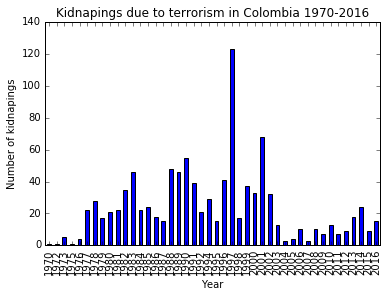

In [36]:
kidnap_count['attacktype1_txt'].plot.bar()
plt.ylabel("Number of kidnapings")
plt.xlabel("Year")
plt.title("Kidnapings due to terrorism in Colombia 1970-2016")

In [37]:
kidnap_join = kidnap_count.reset_index()

In [41]:
kidnap_join.drop(['latitude','longitude','gname','nkill'], axis=1, inplace=True)
kidnap_join.head()

,iyear,attacktype1_txt
0,1970,1
1,1972,1
2,1973,5
3,1975,1
4,1976,4


In [39]:
death_join = death_count_summed.reset_index()
death_join.head()

,iyear,nkill
0,1970,0.0
1,1972,1.0
2,1973,0.0
3,1975,7.0
4,1976,10.0


In [42]:
combine = pd.merge(death_join, kidnap_join, on='iyear', how='outer')

In [51]:
combine.head()

,iyear,nkill,attacktype1_txt
0,1970,0.0,1
1,1972,1.0,1
2,1973,0.0,5
3,1975,7.0,1
4,1976,10.0,4


In [71]:
index = np.arange(1970,2017,1)
columns = ['dummy']
dummy = pd.DataFrame(index=index, columns=columns).fillna(0)

In [72]:
dummy.reset_index(inplace=True)
dummy.head()

,index,dummy
0,1970,0
1,1971,0
2,1972,0
3,1973,0
4,1974,0


In [73]:
dummy.columns = ['iyear','dummy']
dummy.head()

,iyear,dummy
0,1970,0
1,1971,0
2,1972,0
3,1973,0
4,1974,0


In [80]:
combine_fill = pd.merge(dummy, combine, on='iyear', how='left')

In [81]:
combine_fill.head()

,iyear,dummy,nkill,attacktype1_txt
0,1970,0,0.0,1.0
1,1971,0,NaN,NaN
2,1972,0,1.0,1.0
3,1973,0,0.0,5.0
4,1974,0,NaN,NaN


In [82]:
combine_fill['nkill'].fillna(0, inplace=True)

In [84]:
combine_fill['attacktype1_txt'].fillna(0, inplace=True)

In [86]:
combine_fill.drop(['dummy'], axis=1, inplace=True)

In [88]:
combine_fill.head()

,iyear,nkill,attacktype1_txt
0,1970,0.0,1.0
1,1971,0.0,0.0
2,1972,1.0,1.0
3,1973,0.0,5.0
4,1974,0.0,0.0


In [90]:
combine_fill.to_csv('./data/deaths-kidnapings.csv')